In [11]:
# === BIGQUERY → GOOGLE COLAB (READY TO RUN) ===

# Authenticate Google account
from google.colab import auth
auth.authenticate_user()

# Imports
from google.cloud import bigquery
import pandas as pd

# Create BigQuery client
client = bigquery.Client(project="neat-vent-473417-g7")

# Query your table
query = """
SELECT *
FROM `neat-vent-473417-g7.neo_bank.notifications`
"""

# Load into dataframe
df = client.query(query).to_dataframe()

# Preview
df.head()


,reason,channel,status,user_id,created_date
0,METAL_RESERVE_PLAN,SMS,SENT,user_4703,2018-10-14 01:48:13.319987+00:00
1,METAL_RESERVE_PLAN,SMS,SENT,user_2397,2018-10-17 08:07:05.709072+00:00
2,METAL_RESERVE_PLAN,SMS,SENT,user_2411,2018-10-14 03:46:34.244392+00:00
3,METAL_RESERVE_PLAN,SMS,SENT,user_1119,2018-10-14 14:16:35.801185+00:00
4,METAL_RESERVE_PLAN,SMS,SENT,user_3499,2018-10-14 18:41:09.268675+00:00


In [13]:
# Get unique values from the 'reason' column
different_reasons = df['reason'].unique()
print(different_reasons)

['METAL_RESERVE_PLAN' 'REENGAGEMENT_ACTIVE_FUNDS' 'BLACK_FRIDAY'
 'LOST_CARD_ORDER' 'FIFTH_PAYMENT_PROMO' 'JOINING_ANNIVERSARY'
 'PUMPKIN_PAYMENT_NOTIFICATION' 'PREMIUM_ENGAGEMENT_FEES_SAVED'
 'PREMIUM_ENGAGEMENT_INACTIVE_CARD' 'WELCOME_HOME' 'METAL_GAME_START'
 'NO_INITIAL_CARD_USE' 'NO_INITIAL_CARD_ORDER'
 'ONBOARDING_TIPS_ACTIVATED_USERS' 'ENGAGEMENT_SPLIT_BILL_RESTAURANT'
 'MADE_MONEY_REQUEST_NOT_SPLIT_BILL'
 'NO_INITIAL_FREE_PROMOPAGE_CARD_ORDER']


In [15]:
different_status = df['status'].unique()
print(different_status)

['SENT' 'FAILED']


/tmp/ipython-input-2502674285.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='viridis')


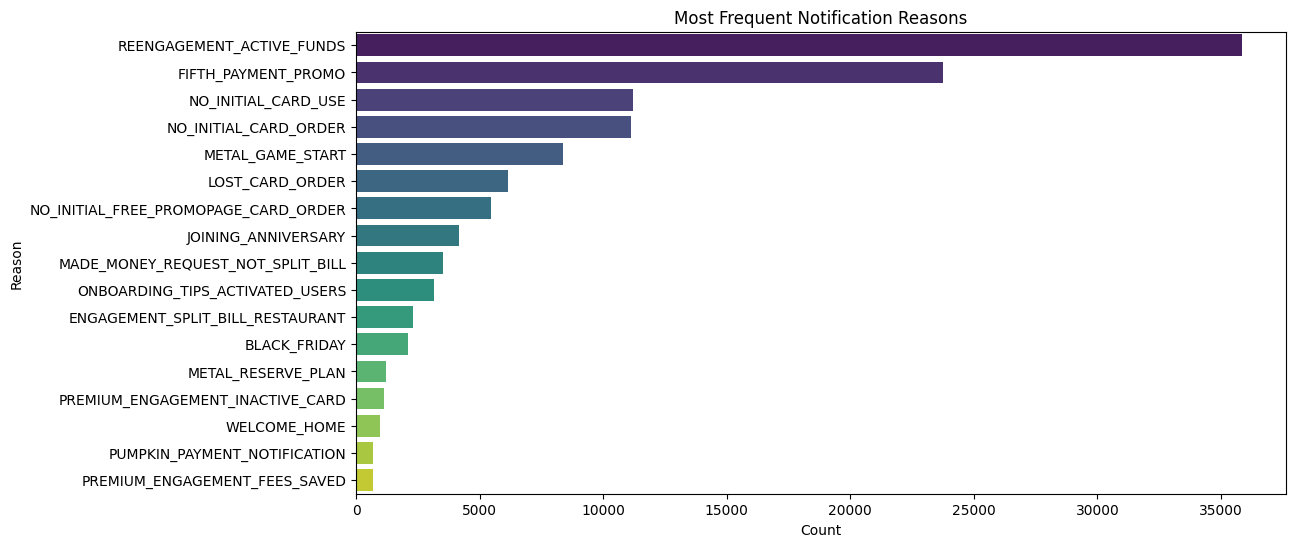

The most frequent reason is: REENGAGEMENT_ACTIVE_FUNDS


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each reason
reason_counts = df['reason'].value_counts()

# Create the visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='viridis')

plt.title('Most Frequent Notification Reasons')
plt.xlabel('Count')
plt.ylabel('Reason')
plt.show()

# Print the top reason
print(f"The most frequent reason is: {reason_counts.idxmax()}")

In [19]:
different_channel = df['channel'].unique()
print(different_channel)

['SMS' 'PUSH' 'EMAIL']


In [21]:
# Calculate the most used channel
most_used_channel = df['channel'].value_counts().idxmax()
channel_counts = df['channel'].value_counts()

print(f"The most used channel is: {most_used_channel}")
print("\nFull breakdown:")
print(channel_counts)

The most used channel is: EMAIL

Full breakdown:
channel
EMAIL    61253
PUSH     57683
SMS       2877
Name: count, dtype: int64


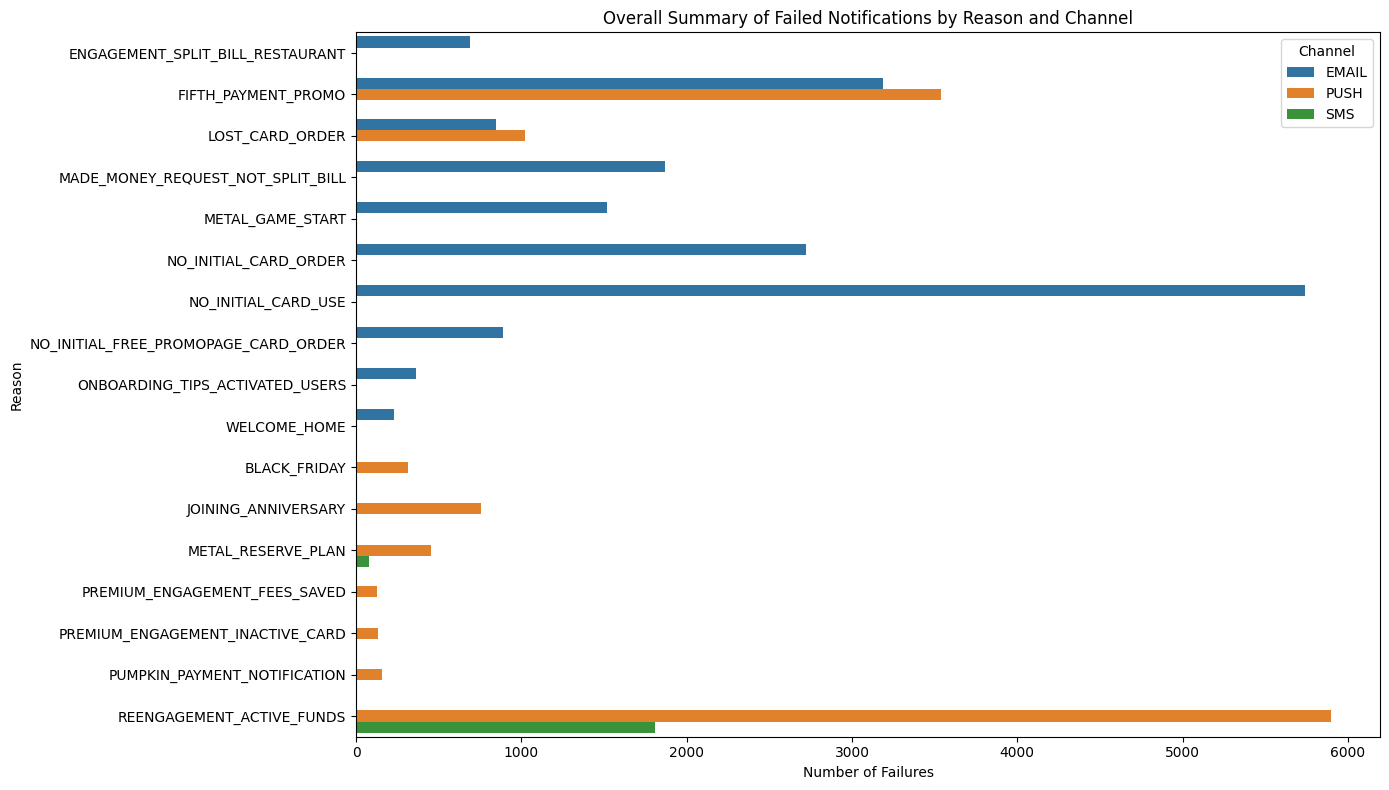

In [24]:
# Calculate failure counts by channel and reason
failure_summary = df[df['status'] == 'FAILED'].groupby(['channel', 'reason']).size().reset_index(name='count')

# Create a pivot for easier plotting or a categorical bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(data=failure_summary, x='count', y='reason', hue='channel')

plt.title('Overall Summary of Failed Notifications by Reason and Channel')
plt.xlabel('Number of Failures')
plt.ylabel('Reason')
plt.legend(title='Channel')
plt.tight_layout()
plt.show()